# FashionMNIST Data Wrangling and Exploration
The purpose of this notebook is to adequately understand, describe, and explore the fmnist data set that will be used in this project.

In [1]:
import os
while os.path.basename(os.getcwd()) != 'Synthetic_Data_GAN_Capstone':
    os.chdir('..')
from scripts.Utils.data_loading import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision
import torchvision.utils as vutils
%matplotlib inline

In [3]:
def show_grid(img):
    im = vutils.make_grid(img)
    plt.figure(figsize=(8,8))
    plt.axis("off")
    plt.title("Training Images")
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))
    plt.show()

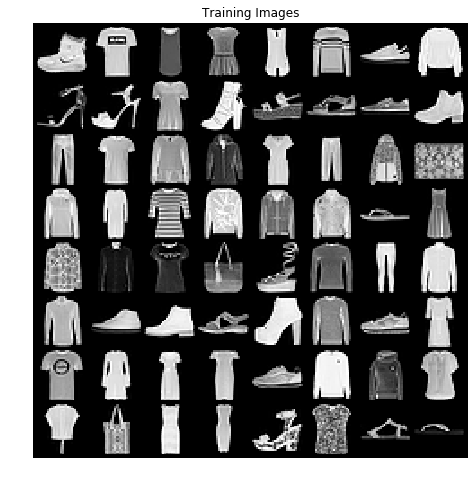

In [4]:
fmnist = load_dataset('fmnist')
images = fmnist[0].data[:64].view(-1, 1, 28, 28).float()
images = images / 255
show_grid(images)

In [6]:
print("Train set is of length:",len(fmnist[0]))
print("Test set is of length:",len(fmnist[1]))
print("Each image is of size:",np.array(fmnist[0][0][0]).shape)

Train set is of length: 60000
Test set is of length: 10000
Each image is of size: (28, 28)


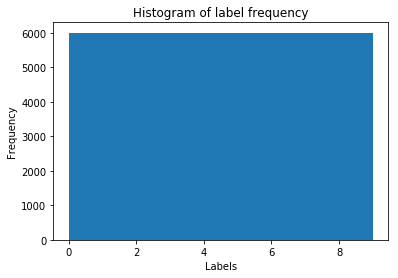

In [8]:
plt.hist(fmnist[0].targets.numpy())
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Histogram of label frequency')
plt.show()

These labels are perfectly balanced.

In [42]:
import torchvision.transforms as t
labels = fmnist[0].targets[:64]
def trnsfm_batch(img, labels):
    PIL = torchvision.transforms.ToPILImage()
    TNSR = torchvision.transforms.ToTensor()
    crop_trnsfm = t.RandomResizedCrop(28, scale = (0.85, 1.0), ratio=(0.75, 1.3333))
    affine_trnsfm = t.RandomAffine((-15, 15))
    vert_trnsfm = t.RandomVerticalFlip(p=0.5)
    hor_trnsfm = t.RandomHorizontalFlip(p=0.5)
    final_trnsfm = t.Compose([PIL, crop_trnsfm, affine_trnsfm, vert_trnsfm, hor_trnsfm, TNSR])
    out = torch.empty_like(img)
    for i in range(64):
        tmp = img[i].view(28, 28)
        out[i] = final_trnsfm(tmp)
    return out

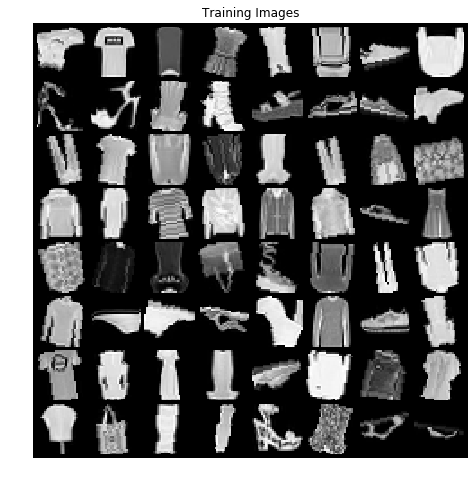

In [106]:
test = trnsfm_batch(images, labels)
show_grid(test)

We can do a lot more flipping around with this dataset, as compared to the MNIST one.